In [97]:
from numpy import genfromtxt
import numpy as np
import matplotlib.pyplot as plt
my_data = genfromtxt('output.csv', delimiter=',',dtype=str, skip_header=1)
print(my_data)

[['"0.34"' '"0.35"' '"0.0"' '"0.0"' '"0"' '"0"']
 ['"0.34"' '"0.35"' '"0.0"' '"0.0"' '"0"' '"0"']
 ['"0.34"' '"0.35"' '"0.0"' '"0.0"' '"0"' '"0"']
 ..., 
 ['"0.63"' '"0.73"' '"0.35"' '"0.275"' '"0"' '"0"']
 ['"0.63"' '"0.74"' '"0.35"' '"0.275"' '"0"' '"0"']
 ['"0.63"' '"0.73"' '"0.35"' '"0.275"' '"0"' '"0"']]


In [98]:
data = np.char.strip(my_data, '"').astype(float)
print(data)

[[ 0.34   0.35   0.     0.     0.     0.   ]
 [ 0.34   0.35   0.     0.     0.     0.   ]
 [ 0.34   0.35   0.     0.     0.     0.   ]
 ..., 
 [ 0.63   0.73   0.35   0.275  0.     0.   ]
 [ 0.63   0.74   0.35   0.275  0.     0.   ]
 [ 0.63   0.73   0.35   0.275  0.     0.   ]]


In [99]:
numValues = data.shape[0]
numValues = numValues/20
time = np.arange(0,numValues,0.05)
print(numValues)
print()

20.75



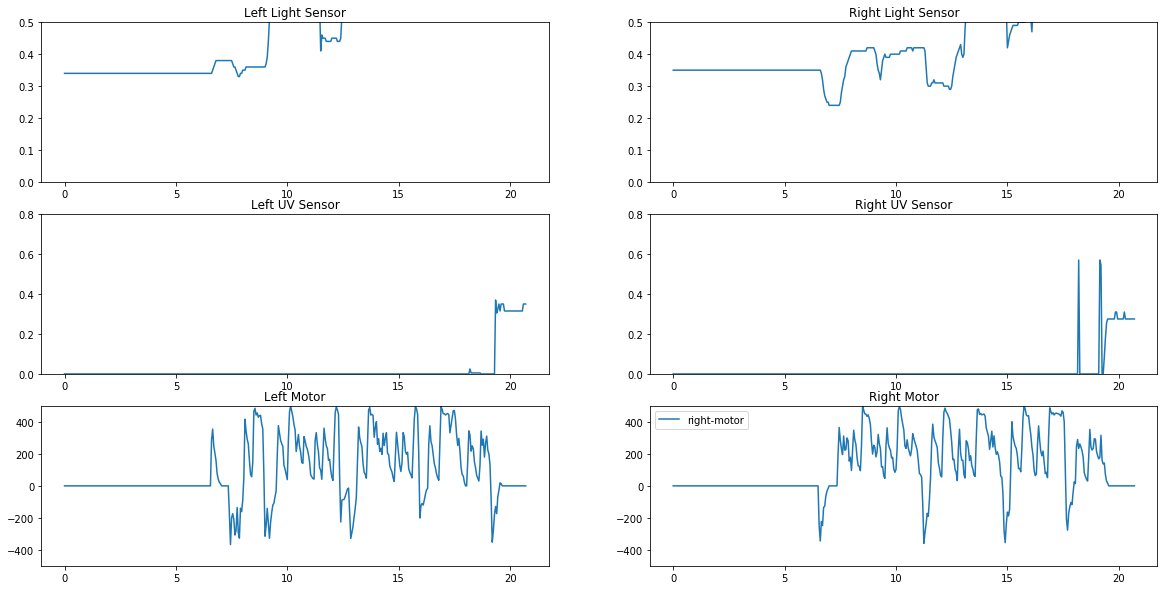

In [100]:
grid = plt.figure(figsize=(20,10))

ls = grid.add_subplot(321)
ls.plot(time, data[:,0], label='left-light')
plt.title("Left Light Sensor")
ls.set_ylim(0, 0.5)

rs = grid.add_subplot(322)
rs.plot(time, data[:,1], label='right-light')
plt.title("Right Light Sensor")
rs.set_ylim(0, 0.5)

luv = grid.add_subplot(323)
luv.plot(time, data[:,2], label='left-uv')
plt.title("Left UV Sensor")
luv.set_ylim(0, 0.8)

ruv = grid.add_subplot(324)
ruv.plot(time, data[:,3], label='right-uv')
plt.title("Right UV Sensor")
ruv.set_ylim(0, 0.8)

lm = grid.add_subplot(325)
lm.plot(time, data[:,4], label='left-motor')
plt.title("Left Motor")
lm.set_ylim(-500, 500)

rm = grid.add_subplot(326)
rm.plot(time, data[:,5], label='right-motor')
plt.title("Right Motor")
rm.set_ylim(-500, 500)


plt.legend()

plt.show()

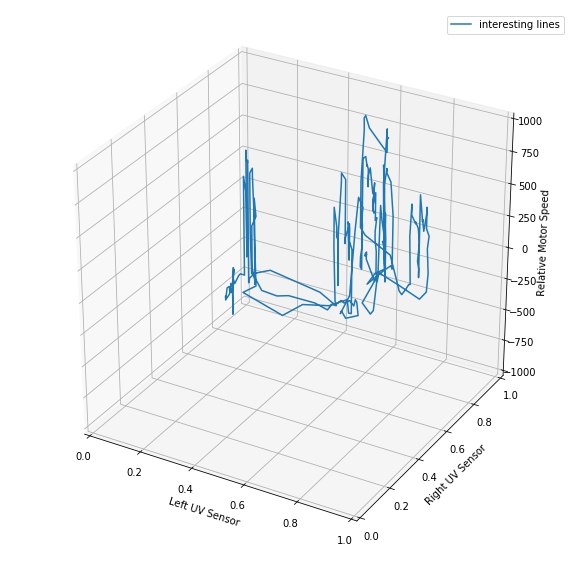

In [101]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

mpl.rcParams['legend.fontsize'] = 10

fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
z = data[:,4] + data[:,5]
x = data[:,0]
y = data[:,1]
ax.plot(x,y,z,label='interesting lines')
ax.legend()
ax.set_xlabel('Left UV Sensor')
ax.set_ylabel('Right UV Sensor')
ax.set_zlabel('Relative Motor Speed')
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_zlim(-1000, 1000)

plt.show()

In [134]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import clear_output
import pandas as pd
import timeit
start_time = timeit.default_timer()
# code you want to evaluate

plt.ion()

while True:
    data = pd.read_csv("output.csv")    
    plt.figure(figsize=(20,10))
    x = data['left sensor'].values + data['right sensor'].values
    y = data['left motor'].values + data['right motor'].values
    clear_output(wait=True)
    plt.subplot(211)
    plt.plot(x, y, label="Sensory-Motor path", color="blue")
    
    recentX = x[-60:]
    recentY = y[-60:]
    plt.plot(recentX, recentY, color="red")

    plt.title("Motor Speed vs Relative Light w/ Vectors")
    plt.quiver(x[:-1], y[:-1], x[1:]-x[:-1], y[1:]-y[:-1], scale_units='xy', angles='xy', scale=1, color='blue')
    plt.quiver(x[-60:-1], y[-60:-1], x[-59:]-x[-60:-1], y[-59:]-y[-60:-1], scale_units='xy', angles='xy', scale=1, color='red')
    plt.xlabel('Light')
    plt.ylabel('Motor Speed')
    
    plt.subplot(212)
    plt.hist2d(x, y, norm=mpl.colors.LogNorm(), bins=11, cmap=plt.cm.YlGnBu)
    plt.title("Motor Speed vs Relative Light w/ Colour Plot")
    plt.xlabel('Light')
    plt.ylabel('Motor Speed')
    
    plt.colorbar(orientation='horizontal', label='Frequency of visits')
    #plt.show()
    plt.tight_layout()
    plt.pause(1)
    elapsed = timeit.default_timer() - start_time
    print(elapsed)
    start_time = timeit.default_timer()
    
while True:
    clear_output()
    plt.pause(1)
clear_output()

KeyboardInterrupt: 